d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# The Bias-Variance Tradeoff

## Configuration

In [0]:
pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Using cached mlflow-1.18.0-py3-none-any.whl (14.2 MB)
Collecting click>=7.0
 Using cached click-8.0.1-py3-none-any.whl (97 kB)
Processing /root/.cache/pip/wheels/69/6f/b4/2087abb1172ae32c58e366dc09746de46a72b0e9fb2c022920/prometheus_flask_exporter-0.18.2-py3-none-any.whl
Processing /root/.cache/pip/wheels/9d/de/6d/ca8d461ec29e010b1267d7353d0b058819770f7680bb9360e4/alembic-1.4.1-py2.py3-none-any.whl
Requirement already satisfied: protobuf>=3.7.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.17.0)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.5)
Processing /root/.cache/pip/wheels/e9/f3/dc/eeff77dbc147629fa716741fc216520abbc0e15ce4b876706f/databricks_cli-0.14.3-py3-none-any.whl
Collecting gitpython>=2.1.0
 Using cached GitPython-3.1.18-py3-none-any.whl (170 kB)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Collecting gunicorn; platform_system != "Windows"
 Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
Collecting packaging
 Using cached packaging-21.0-py3-none-any.whl (40 kB)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Collecting Flask
 Using cached Flask-2.0.1-py3-none-any.whl (94 kB)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Collecting cloudpickle
 Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Collecting docker>=4.0.0
 Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
Collecting pyyaml>=5.1
 Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Collecting sqlparse>=0.3.1
 Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
Collecting querystring-parser
 Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting sqlalchemy
 Using cached SQLAlchemy-1.4.20-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
Collecting prometheus-client
 Using cached prometheus_client-0.11.0-py2.py3-none-any.whl (56 kB)
Collecting python-editor>=0.3
 Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
Collecting Mako
 Using cached Mako-1.1.4-py2.py3-none-any.whl (75 kB)
Requirement already satisfied: python-dateutil in /databricks/python3/lib/python3.8/site-packages (from alembic<=1.4.1->mlflow) (2.8.1)
Requirement already satisfied: six>=1.9 in /databricks/python3/lib/python3.8/site-packages (from protobuf>=3.7.0->mlflow) (1.15.0)
Collecting tabulate>=0.7.7
 Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Collecting gitdb<5,>=4.0.1
 Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
Requirement already satisfied: setuptools>=3.0 in /databricks/python3/lib/python3.8/site-packages (from gunicorn; platform_system != "Windows"->mlflow) (50.3.1)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->mlflow) (2.4.7)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2.10)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2020.12.5)
Collecting Werkzeug>=2.0
 Using cached Werkzeug-2.0.1-py3-none-any.whl (288 kB)
Collecting itsdangerous>=2.0
 Using cached itsdangerous-2.0.1-py3-none-any.whl (18 kB)
Collecting Jinja2>=3.0
 Using cached Jinja2-3.0.1-py3-none-any.whl 

In [0]:
%run ./includes/configuration

### Load Data and Scipy Libraries

In [0]:
%run ./includes/preprocessing

## The Bias-Variance Tradeoff

In this notebook, we are interested in the uncertainty associated with
a particular classification model.

When measuring the uncertainty of a model, we are frequently
interested in:

- the **bias** of that model
   - how well it performs classification
- the **variance** of that model
   — how much the model will differ if fit using different training data

Minimizing bias will frequently increase the variance and vice
versa. An optimal model will simultaneously minimize both bias and variance.
This simultaneous minimization the Bias-Variance Tradeoff.

### Model Selection

In this notebook, we will examine many different models for predicting
our target prepared using our feature data. Each of these models
will be prepared using a different subset of the four features:

- `mean_resting_heartrate`
- `mean_active_heartrate`
- `mean_BMI`
- `mean_VO2_max`

We will use the estimated bias and variance of each of these models
to assess which model or models is likely to be the optimal model.

We will also consider the complexity of each model relative to the
estimated bias and variance.

### Estimating Bias and Variance with the Bootstrap

The **bootstrap** is a method for estimating uncertainty, in this
case uncertainty associated with bias and variance.

The method involves generating a series of subsample sets by
sampling with replacement from our dataset.

We will then fit a particular model under examination against
each of the bootstrap subsample sets.

The **accuracy mean** across the models fit to each
subsample set will be used to estimate **bias**.

The **accuracy standard deviation** across the models fit to each
subsample set will be used to estimate **variance**.

### Bootstrap Generator

In the next cell, we define a function to generate bootstrap samples.

💪🏼 Note that we make sure to sample evenly across each of the
three lifestyles.

In [0]:
lifestyles = health_tracker_sample_agg_pd_df.lifestyle.unique()
np.random.seed(10)

def generate_bootstrap_sample():
  df = health_tracker_sample_agg_pd_df
  sample_df_list = []
  for lifestyle in lifestyles:
    sample_df_list.append(
      df[df.lifestyle == lifestyle].sample(5)
    )
  return pd.concat(sample_df_list)

In [0]:
generate_bootstrap_sample()

Out[13]:

,_id,lifestyle,mean_BMI,mean_active_heartrate,mean_resting_heartrate,mean_VO2_max
67,dacde26e-e48a-11ea-8204-0242ac110002,weight trainer,28.886973,123.798555,61.685819,29.231060
68,dd0191f2-e48a-11ea-8204-0242ac110002,weight trainer,24.606081,112.460244,56.547617,33.991730
2,e0f82e1a-e48a-11ea-8204-0242ac110002,weight trainer,18.416251,111.821004,52.206402,38.642372
15,deb37506-e48a-11ea-8204-0242ac110002,weight trainer,20.819537,119.534940,53.447329,38.090562
12,de9ee85c-e48a-11ea-8204-0242ac110002,weight trainer,28.250648,125.304539,62.630391,31.625451
69,f5ac9a26-e48a-11ea-8204-0242ac110002,sedentary,21.457163,134.167624,80.793385,24.808528
13,01bcef3c-e48b-11ea-8204-0242ac110002,sedentary,23.537562,134.970643,80.753708,21.582622
21,fd39d8ee-e48a-11ea-8204-0242ac110002,sedentary,28.219500,152.646518,70.851512,25.643272
89,f466a17a-e48a-11ea-8204-0242ac110002,sedentary,25.650951,151.346457,71.946747,30.258792
73,fce0111a-e48a-11ea-8204-0242ac110002,sedentary,18.007512,146.235131,96.978069,18.067967


### Generate Subsample Sets

In [0]:
subsample_sets = []

for _ in range(10):
  subsample_sets.append(generate_bootstrap_sample())

### Generate Subsample Sets with List Comprehension

In [0]:
# TODO
subsample_sets = [generate_bootstrap_sample() for _ in range(10)]

### Display the Number of Samples in Each Subsample Set

Use the `len` built-in function to display the size of each subsample set.

In [0]:
# TODO
[len(sample_set) for sample_set in subsample_sets]

Out[16]: [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

### Display the Second Subsample Set

In [0]:
# TODO
subsample_sets[1]

Out[17]:

,_id,lifestyle,mean_BMI,mean_active_heartrate,mean_resting_heartrate,mean_VO2_max
74,d8607366-e48a-11ea-8204-0242ac110002,weight trainer,21.286981,113.066282,55.010316,35.991845
77,d6998ed2-e48a-11ea-8204-0242ac110002,weight trainer,17.872297,134.642533,52.036690,40.319386
75,d87f14d8-e48a-11ea-8204-0242ac110002,weight trainer,21.639284,122.213814,54.818647,38.434658
49,da2e744a-e48a-11ea-8204-0242ac110002,weight trainer,29.398334,133.521795,61.870593,29.222442
93,d5cd854e-e48a-11ea-8204-0242ac110002,weight trainer,21.453872,131.588075,56.692859,35.494366
29,f891757c-e48a-11ea-8204-0242ac110002,sedentary,22.130732,126.506258,76.914666,25.221245
45,fe4c3d94-e48a-11ea-8204-0242ac110002,sedentary,28.433617,132.527152,67.858016,27.743192
92,f888dade-e48a-11ea-8204-0242ac110002,sedentary,22.186664,148.937571,80.726781,23.644529
35,fed7938a-e48a-11ea-8204-0242ac110002,sedentary,15.967515,146.889774,93.939082,17.503768
24,fc4324ea-e48a-11ea-8204-0242ac110002,sedentary,14.196511,148.149563,99.174846,14.988258


### Numerically Encode the Target

1. Fit the `LabelEncoder` on the original target (`health_tracker_sample_agg_pd_df["lifestyle"]`)
2. Transform each dataframe subset using the for-loop

In [0]:
# TODO
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(health_tracker_sample_agg_pd_df["lifestyle"])

for sample_set in subsample_sets:
  sample_set["lifestyle_encoded"] = le.transform(sample_set["lifestyle"])

## Design Experiment

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

### Step 1: Build Subsets of Features.

In [0]:
feature_subset = ["mean_active_heartrate"]
experimental_data_subsets = [
  sample_set[feature_subset]
  for sample_set in subsample_sets
]

targets = [
  sample_set["lifestyle_encoded"]
  for sample_set in subsample_sets
]

### Fit the `GridSearchCV` on each subset using Cross-Validation

In [0]:
# TODO
experimental_scores = []
for features, target in zip(experimental_data_subsets, targets):
  gs = GridSearchCV(DecisionTreeClassifier(), param_grid={}, cv=5)
  gs.fit(features, target)
  score = gs.cv_results_["mean_test_score"][0]
  experimental_scores.append(score)

#### Display Cross-Validation Results

In [0]:
pd.DataFrame(gs.cv_results_).T

Out[23]:

,0
mean_fit_time,0.00300384
std_fit_time,7.36257e-05
mean_score_time,0.00230155
std_score_time,4.74525e-05
params,{}
split0_test_score,0.666667
split1_test_score,1
split2_test_score,0.666667
split3_test_score,0.666667
split4_test_score,0.666667


### Display Experiment Results

In [0]:
print(feature_subset)
print("Mean Score: ", np.mean(experimental_scores))
print("Standard Deviation Score: ", np.std(experimental_scores))

['mean_active_heartrate']
Mean Score: 0.6533333333333334
Standard Deviation Score: 0.14236104336041747

## Define MLflow Experiment Runner

In [0]:
import mlflow
from sklearn.linear_model import LogisticRegression

def experiment_runner(feature_subset):
  """Helper function to run MLflow experiment on a feature subset."""
  with mlflow.start_run() as run:
    "Build Subsets of Features."
    experimental_data_subsets = [
        sample_set[feature_subset]
        for sample_set in subsample_sets
    ]

    targets = [
      sample_set["lifestyle_encoded"]
      for sample_set in subsample_sets
    ]

    "Fit on each subset using Cross-Validation."
    experimental_scores = []
    for features, target in zip(experimental_data_subsets, targets):
      gs = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid={}, cv=5)
      gs.fit(features, target)
      score = gs.cv_results_["mean_test_score"][0]
      experimental_scores.append(score)

    "Record experiment results."
    mlflow.log_param("subset", feature_subset)
    mlflow.log_metric("mean score", np.mean(experimental_scores))
    mlflow.log_metric("std score", np.std(experimental_scores))

In [0]:
experiment_runner(["mean_active_heartrate"])

### Generate Feature Subsets

Generates the superset of all combinations of features (minus the empty set).

In [0]:
from itertools import combinations

feature_columns = health_tracker_sample_agg_pd_df.select_dtypes(exclude=["object"]).columns
feature_subsets = []
for i in range(1, 5):
  feature_subsets += [list(feat) for feat in combinations(feature_columns, i)]

feature_subsets

Out[27]: [['mean_BMI'],
 ['mean_active_heartrate'],
 ['mean_resting_heartrate'],
 ['mean_VO2_max'],
 ['mean_BMI', 'mean_active_heartrate'],
 ['mean_BMI', 'mean_resting_heartrate'],
 ['mean_BMI', 'mean_VO2_max'],
 ['mean_active_heartrate', 'mean_resting_heartrate'],
 ['mean_active_heartrate', 'mean_VO2_max'],
 ['mean_resting_heartrate', 'mean_VO2_max'],
 ['mean_BMI', 'mean_active_heartrate', 'mean_resting_heartrate'],
 ['mean_BMI', 'mean_active_heartrate', 'mean_VO2_max'],
 ['mean_BMI', 'mean_resting_heartrate', 'mean_VO2_max'],
 ['mean_active_heartrate', 'mean_resting_heartrate', 'mean_VO2_max'],
 ['mean_BMI',
 'mean_active_heartrate',
 'mean_resting_heartrate',
 'mean_VO2_max']]

### Run Experiments Using Logistic Regression On Each Feature Subset

In [0]:
for feature_subset in feature_subsets:
  experiment_runner(feature_subset)

### Access MLflow Runs Associated with This Notebook

In [0]:
results = mlflow.search_runs()
type(results)

Out[29]: pandas.core.frame.DataFrame

### Prepare Results Data

In [0]:
results = results[['metrics.mean score', 'metrics.std score', 'params.subset']]
results = results[~results["params.subset"].isnull()]
results.drop_duplicates(inplace=True)
results

Out[30]:

,metrics.mean score,metrics.std score,params.subset
0,0.780000,0.111754,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
1,0.806667,0.086667,"['mean_active_heartrate', 'mean_resting_heartr..."
2,0.820000,0.089691,"['mean_BMI', 'mean_resting_heartrate', 'mean_V..."
3,0.766667,0.116428,"['mean_BMI', 'mean_active_heartrate', 'mean_VO..."
4,0.720000,0.102415,"['mean_BMI', 'mean_active_heartrate', 'mean_re..."
5,0.880000,0.097980,"['mean_resting_heartrate', 'mean_VO2_max']"
6,0.806667,0.124544,"['mean_active_heartrate', 'mean_VO2_max']"
7,0.706667,0.085375,"['mean_active_heartrate', 'mean_resting_heartr..."
8,0.706667,0.095219,"['mean_BMI', 'mean_VO2_max']"
9,0.773333,0.053333,"['mean_BMI', 'mean_resting_heartrate']"


#### Augment Results with `n_terms` Column

In [0]:
results["n_terms"] = results["params.subset"].apply(lambda x: x.count(",") + 1)
results["metrics.mean score"] = 1 - results["metrics.mean score"]
results

Out[31]:

,metrics.mean score,metrics.std score,params.subset,n_terms
0,0.220000,0.111754,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",4
1,0.193333,0.086667,"['mean_active_heartrate', 'mean_resting_heartr...",3
2,0.180000,0.089691,"['mean_BMI', 'mean_resting_heartrate', 'mean_V...",3
3,0.233333,0.116428,"['mean_BMI', 'mean_active_heartrate', 'mean_VO...",3
4,0.280000,0.102415,"['mean_BMI', 'mean_active_heartrate', 'mean_re...",3
5,0.120000,0.097980,"['mean_resting_heartrate', 'mean_VO2_max']",2
6,0.193333,0.124544,"['mean_active_heartrate', 'mean_VO2_max']",2
7,0.293333,0.085375,"['mean_active_heartrate', 'mean_resting_heartr...",2
8,0.293333,0.095219,"['mean_BMI', 'mean_VO2_max']",2
9,0.226667,0.053333,"['mean_BMI', 'mean_resting_heartrate']",2


### Plot the Model Results Versus Bias and Variance

Out[32]:

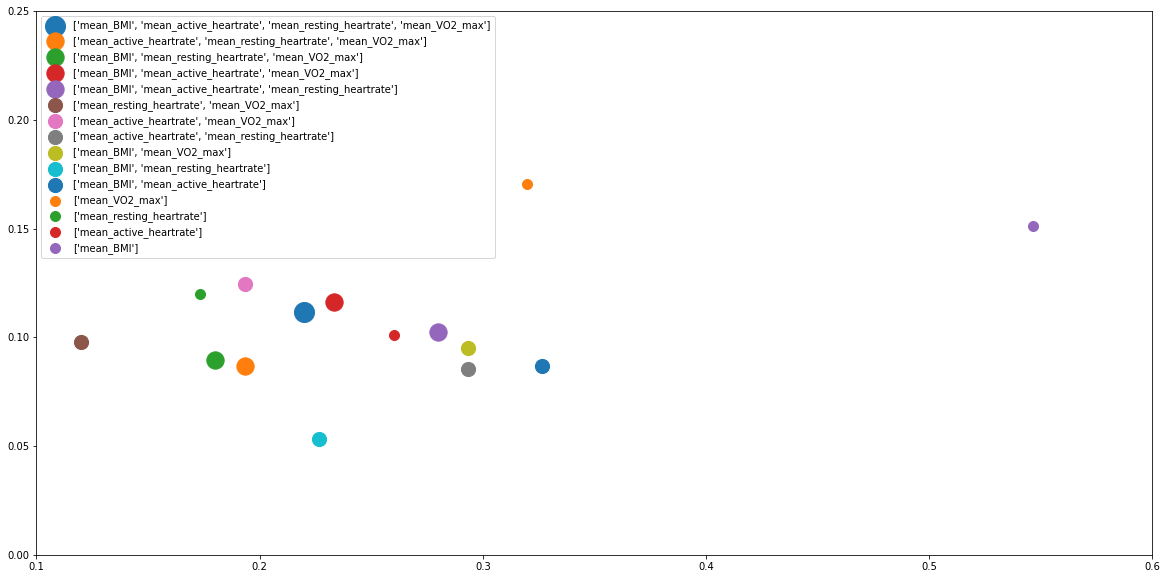

<matplotlib.legend.Legend at 0x7fe7b6d272e0>

In [0]:
plt.figure(figsize=(20,10))

for _, (bias, variance, description, n_terms) in results.iterrows():
   plt.scatter(bias, variance, s=100*n_terms, label=description)
plt.xlim(0.1, 0.6)
plt.ylim(0, 0.25)
plt.legend()


-sandbox
&copy; 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>